<a href="https://colab.research.google.com/github/obeabi/Bayesian_AB_Testing/blob/main/Optimistic_InitialValue_Bernouli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
NUM_TRIALS = 100000
BANDIT_PROBABILITIES = [0.1, 0.3, 0.8]

## Bandit arm class

In [13]:
class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 50
    self.N = 1

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N +=1
    self.p_estimate = ((self.N - 1)* self.p_estimate    + x)/ self.N


## Run experiment

In [14]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  for i in range(NUM_TRIALS):
    # use optimistic initial values to select the next bandit
    j = np.argmax([b.p_estimate for b in bandits])

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

  # print mean estimates for each bandit
  for b in bandits:
    print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

mean estimate: 0.7894736842105256
mean estimate: 0.7878787878787876
mean estimate: 0.7995652522338375
total reward earned: 79807.0
overall win rate: 0.79807
num times selected each bandit: [76, 99, 99828]


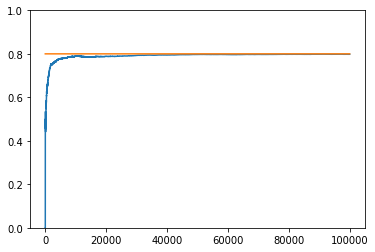

In [15]:
# results
if __name__ == "__main__":
  experiment()